In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [5]:
dfTrain = pd.read_csv('data/train.csv')

dfFeatures = pd.read_csv('data/features.csv')
dfFeatures.drop(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], inplace=True, axis=1)

dfStores = pd.read_csv('data/stores.csv')

In [79]:
_df = dfTrain.merge(dfFeatures, how="inner", on=["Store", "Date", "IsHoliday"]).merge(dfStores, how="inner", on="Store")

In [80]:
df = _df.groupby(['Store','Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']).agg({'Weekly_Sales':'sum'}).reset_index()

df.drop("Store", inplace=True, axis=1)
df.drop("Date", inplace=True, axis=1)
df['IsHoliday'] = df['IsHoliday'].replace(False, 0).replace(True, 1)
df['Type'] = df['Type'].replace('A', 0).replace('B', 1).replace('C', 2)
df

,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,0,151315,1643690.90
1,1,38.51,2.548,211.242170,8.106,0,151315,1641957.44
2,0,39.93,2.514,211.289143,8.106,0,151315,1611968.17
3,0,46.63,2.561,211.319643,8.106,0,151315,1409727.59
4,0,46.50,2.625,211.350143,8.106,0,151315,1554806.68
...,...,...,...,...,...,...,...,...
6430,0,64.88,3.997,192.013558,8.684,1,118221,713173.95
6431,0,64.89,3.985,192.170412,8.667,1,118221,733455.07
6432,0,54.47,4.000,192.327265,8.667,1,118221,734464.36
6433,0,56.47,3.969,192.330854,8.667,1,118221,718125.53


array([[<AxesSubplot:xlabel='IsHoliday', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='Temperature', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='Fuel_Price', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='CPI', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='Size', ylabel='IsHoliday'>,
        <AxesSubplot:xlabel='Type', ylabel='IsHoliday'>],
       [<AxesSubplot:xlabel='IsHoliday', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Fuel_Price', ylabel='Temperature'>,
        <AxesSubplot:xlabel='CPI', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Size', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Type', ylabel='Temperature'>],
       [<AxesSubplot:xlabel='IsHoliday', ylabel='Fuel_Price'>,
        <AxesSubplot:xlabel='Temperature', ylabel='Fuel_Price'>,
        

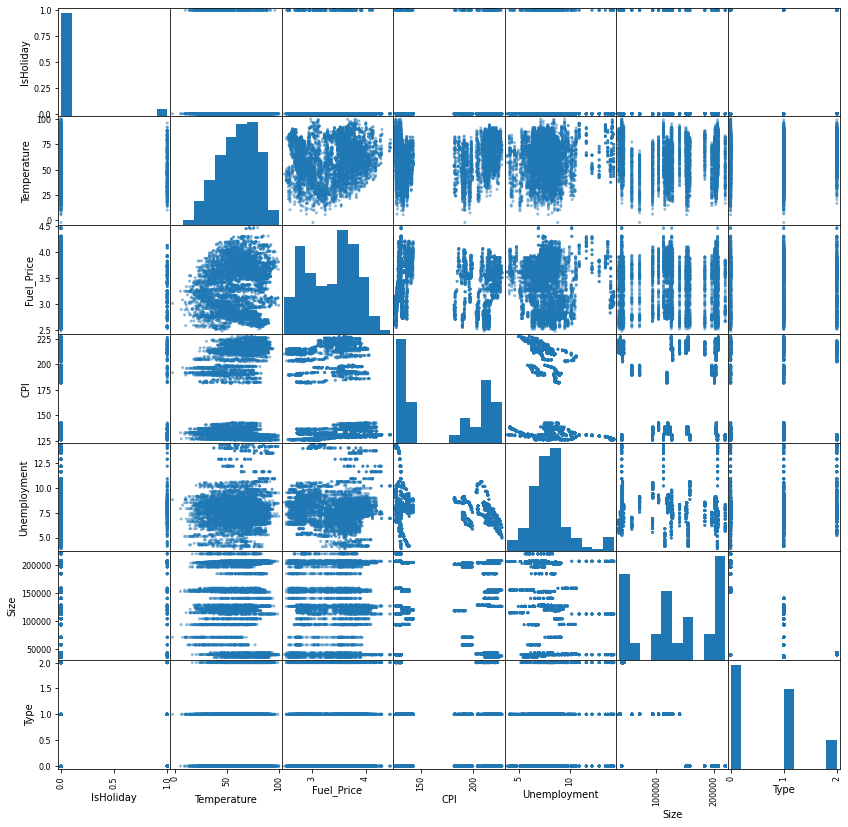

In [81]:
# Scatter Matrix
_df = df[[
    'IsHoliday',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Size',
    'Type'
    ]]

scatter_matrix(_df, diagonal='hist', figsize=(14, 14))

<AxesSubplot:>

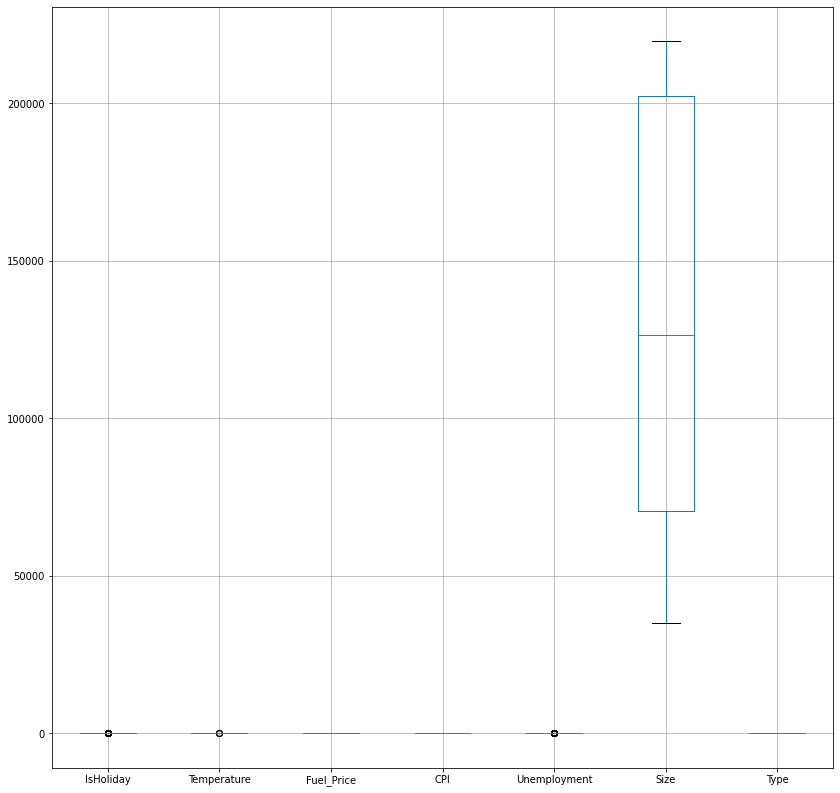

In [82]:
import matplotlib.pyplot as plt
df.boxplot(column=['IsHoliday',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Size',
    'Type'],figsize=(14,14) )

In [83]:
y = df['Type']
x = df.drop('Type', axis= 1)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [84]:
x.shape, y.shape, x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((6435, 7), (6435,), (4504, 7), (4504,), (1931, 7), (1931,))

In [85]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)
from sklearn.tree import DecisionTreeClassifier

In [86]:

# instancia um DecisionTreeClassifier
modelo= DecisionTreeClassifier()

# treina o classificador
modelo.fit(x_treino, y_treino)
DT_pred = modelo.predict(x_teste)

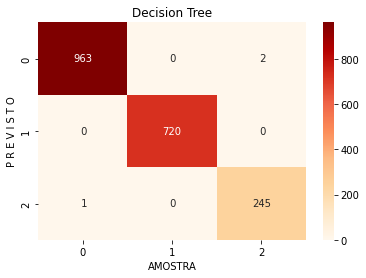

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.heatmap(confusion_matrix(y_teste, DT_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Decision Tree')
plt.ylabel('P R E V I S T O')
plt.xlabel('AMOSTRA')
plt.show()

In [89]:
# Acuracidade
print("ACC (DT) :%.2f" %(accuracy_score(y_teste,DT_pred)))

#Revocação
print("Recall (DT) :%.2f" %(recall_score(y_teste,DT_pred, average='micro')))

#Precisão
print("Precision (DT) :%.2f" %(precision_score(y_teste,DT_pred, average='micro'))) 

#F1-score
print("F1-score (DT) :%.2f" %(f1_score(y_teste,DT_pred, average='micro'))) 


ACC (DT) :1.00
Recall (DT) :1.00
Precision (DT) :1.00
F1-score (DT) :1.00
